In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random



In [2]:

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:


train_dir = 'Training'
test_dir = 'Testing'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

train = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=12
)

val = val_datagen.flow_from_directory(
    train_dir,  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation', 
)

test = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

Found 4633 images belonging to 4 classes.
Found 815 images belonging to 4 classes.
Found 1226 images belonging to 4 classes.


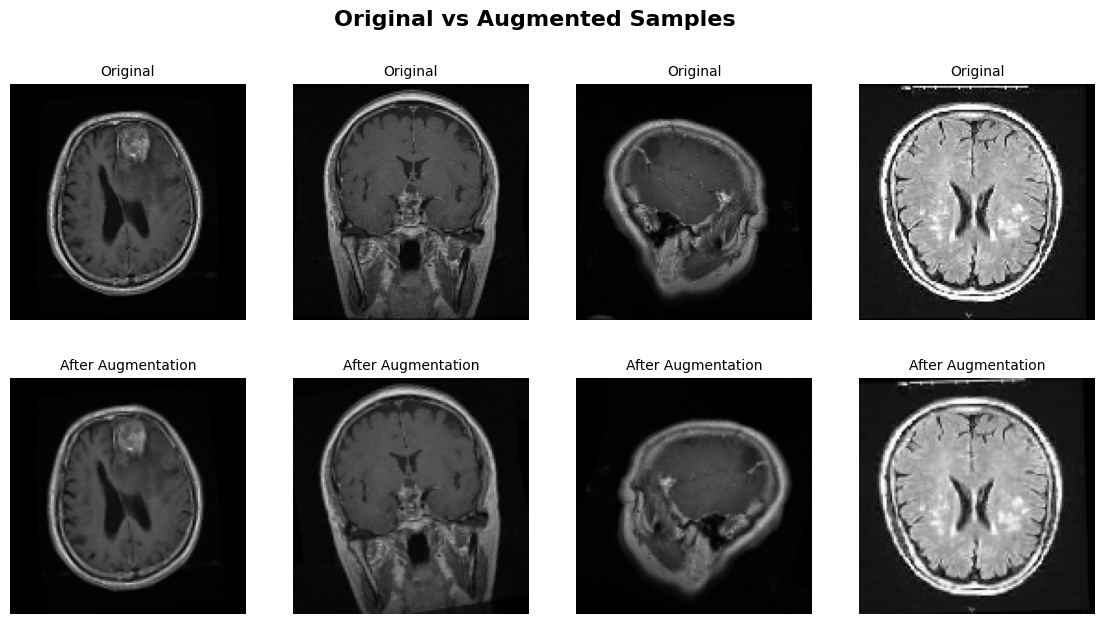

In [4]:
from tensorflow.keras.preprocessing import image

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle("Original vs Augmented Samples", fontsize=16, fontweight='bold')

sample_paths = random.sample(train.filepaths, 4)

for i, img_path in enumerate(sample_paths):

    original_img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(original_img)
    x = np.expand_dims(x, axis=0)

    aug_iter = datagen.flow(x, batch_size=1)
    augmented_img = next(aug_iter)[0].astype('float32')

    axes[0, i].imshow(original_img)
    axes[0, i].set_title("Original", fontsize=10)
    axes[0, i].axis('off')

    axes[1, i].imshow(augmented_img)
    axes[1, i].set_title("After Augmentation", fontsize=10)
    axes[1, i].axis('off')

plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3),padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu',padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(256, (3,3), activation='relu',padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    
    Dense(4, activation='softmax')
])
model.summary()


C:\Users\Parveen Kaur\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,215,108 (65.67 MB)

 Trainable params: 17,215,108 (65.67 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # type: ignore

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-4,
    verbose=1
)

history = model.fit(
    train,
    validation_data=val,
    epochs=60, 
    callbacks=[early_stop, lr_scheduler],
)

# Handle case where early stopping didn't trigger
if early_stop.stopped_epoch > 0:
    best_epoch = early_stop.stopped_epoch - early_stop.patience + 1
else:
    best_epoch = len(history.history['accuracy']) - 1  # last epoch

best_acc = history.history['accuracy'][best_epoch]
best_val_acc = history.history['val_accuracy'][best_epoch]

print(f"Best epoch (chosen by EarlyStopping): {best_epoch}")
print(f"Training accuracy at best epoch: {best_acc:.4f}")
print(f"Validation accuracy at best epoch: {best_val_acc:.4f}")


C:\Users\Parveen Kaur\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.5668 - loss: 1.5518 - val_accuracy: 0.6196 - val_loss: 1.3371 - learning_rate: 0.0010
Epoch 2/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.7378 - loss: 0.9717 - val_accuracy: 0.7460 - val_loss: 1.0391 - learning_rate: 0.0010
Epoch 3/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.7744 - loss: 0.8265 - val_accuracy: 0.6319 - val_loss: 1.3305 - learning_rate: 0.0010
Epoch 4/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8161 - loss: 0.7505 - val_accuracy: 0.8037 - val_loss: 0.8385 - learning_rate: 0.0010
Epoch 5/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8226 - loss: 0.7004 - val_accuracy: 0.8098 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 6/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8282 - loss: 0.6731 - val_accuracy: 0.8025 - val_loss: 0.8120 - learning_rate: 0.0010
Epoch 7/60
145/145 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8411 - loss: 0.

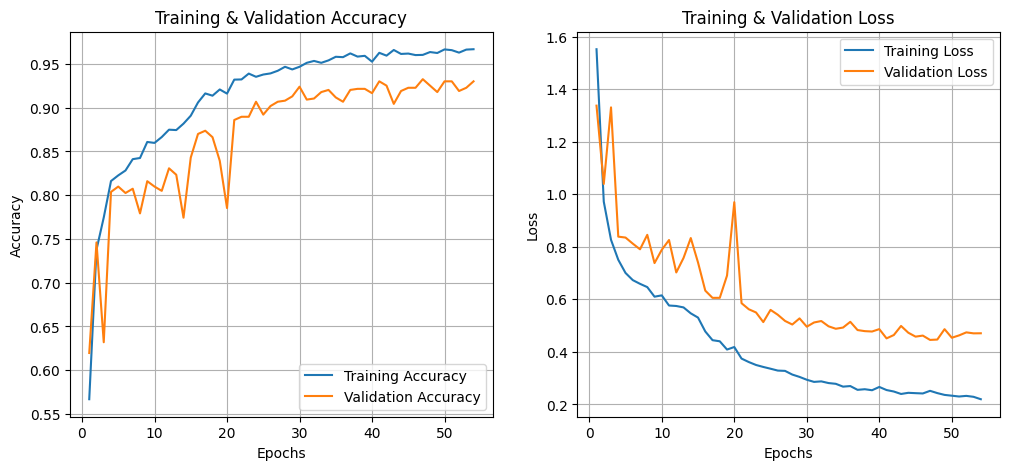

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss')
ax2.legend()
ax2.grid(True)

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 502ms/step - accuracy: 0.9641 - loss: 0.2932
Test Accuracy: 96.41%
Test Loss: 0.2932


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step
              precision    recall  f1-score   support

      glioma       0.96      0.95      0.96       300
  meningioma       0.95      0.90      0.92       306
     notumor       0.95      0.98      0.97       320
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1226
   macro avg       0.96      0.96      0.96      1226
weighted avg       0.96      0.96      0.96      1226



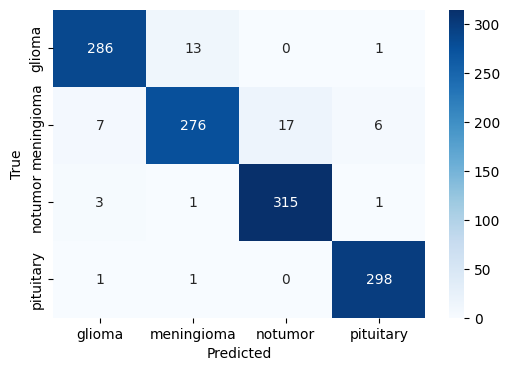

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
model.save('my_model1.keras')

In [12]:
# from tensorflow.keras.models import load_model
# model = load_model('/kaggle/working/my_model.keras')

In [13]:
import os

train_dir = "Training"   

classes = ["glioma", "meningioma", "notumor", "pituitary"]

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        print(f"{class_name}: {num_images} images")
    else:
        print(f"{class_name}: Folder not found")


glioma: 1321 images
meningioma: 1339 images
notumor: 1331 images
pituitary: 1457 images
